# Logistic Regression to predict the probability of churn of a customer

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.optimize as opt
import pylab as pl

In [118]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Feature Selection and Normalization

In [119]:
dffs = df[['tenure','age','address','income','ed','employ','equip','callcard','churn']]
dffs['churn'] = dffs['churn'].astype('int')
dffs.head()

<ipython-input-119-ba36a85cec27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffs['churn'] = dffs['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0


In [120]:
x = dffs[['tenure','age','address','income','ed','employ','equip']]
y = dffs['churn']

In [121]:
# normalizing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

# Training and testing

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)

# Modeling with Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=0.05, solver='saga')
lgr.fit(x_train,y_train)

LogisticRegression(C=0.05, solver='saga')

In [124]:
yhat_t = lgr.predict(x_test)
yhat_n = lgr.predict(x_train)
yhat_logt = lgr.predict_proba(x_test)
yhat_logn = lgr.predict_proba(x_train)
print(yhat_logt[0:5])
print('--------------------------------')
print(yhat_logn[0:5])

[[0.68530657 0.31469343]
 [0.84103437 0.15896563]
 [0.77063117 0.22936883]
 [0.85822511 0.14177489]
 [0.77194302 0.22805698]]
--------------------------------
[[0.39199635 0.60800365]
 [0.68877878 0.31122122]
 [0.93582905 0.06417095]
 [0.74031181 0.25968819]
 [0.72659276 0.27340724]]


# Model Evaluation

In [125]:
from sklearn import metrics
print('Accuracy score for Testing set:', metrics.accuracy_score(y_test, yhat_t))
print('Accuracy score for Training set:', metrics.accuracy_score(y_train, yhat_n))

Accuracy score for Testing set: 0.7666666666666667
Accuracy score for Training set: 0.7642857142857142


In [127]:
#confusion matrix
import itertools
import seaborn as sns
cm1 = metrics.confusion_matrix(y_test,yhat_t)
cm2 = metrics.confusion_matrix(y_train,yhat_n)

[Text(0, 0.5, 'churn=1'), Text(0, 1.5, 'churn=0')]

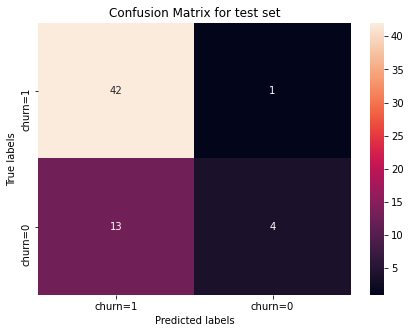

In [128]:
# data visualization for test dataset
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test set'); 
ax.xaxis.set_ticklabels(['churn=1','churn=0']) 
ax.yaxis.set_ticklabels(['churn=1','churn=0'])

[Text(0, 0.5, 'churn=1'), Text(0, 1.5, 'churn=0')]

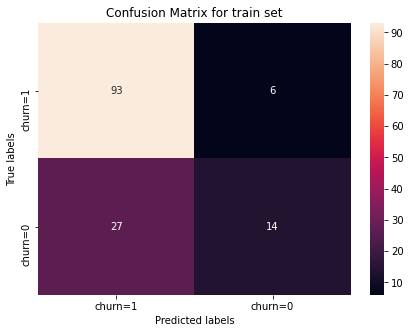

In [129]:
# data viz for train dataset
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train set'); 
ax.xaxis.set_ticklabels(['churn=1','churn=0']) 
ax.yaxis.set_ticklabels(['churn=1','churn=0'])

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_t))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        43
           1       0.80      0.24      0.36        17

    accuracy                           0.77        60
   macro avg       0.78      0.61      0.61        60
weighted avg       0.77      0.77      0.72        60



In [131]:
print(classification_report(y_train, yhat_n))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.70      0.34      0.46        41

    accuracy                           0.76       140
   macro avg       0.74      0.64      0.65       140
weighted avg       0.75      0.76      0.74       140



# Support Vector Machines

<Figure size 576x432 with 0 Axes>

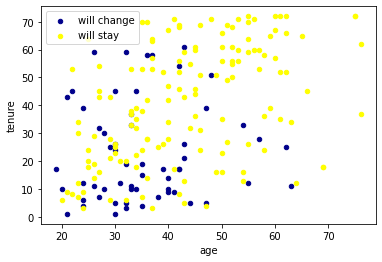

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ax = dffs[dffs['churn'] == 1].plot(kind='scatter', x='age', y='tenure', color='DarkBlue', label='will change')
dffs[dffs['churn'] == 0].plot(kind='scatter', x='age', y='tenure', color='Yellow', label='will stay', ax=ax)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.show()

In [133]:
from sklearn import svm
sc = svm.SVC(kernel='rbf')
sc.fit(x_train, y_train)

SVC()

In [134]:
yhat_s = sc.predict(x_test)
print(yhat_s[0:9])

[0 0 0 0 0 0 0 0 1]


In [135]:
yhat_sn = sc.predict(x_train)
print(yhat_sn[0:9])

[1 0 0 0 0 1 0 0 0]


# Evaluation

In [136]:
from sklearn import metrics
print('Accuracy score for Testing set:', metrics.accuracy_score(y_test, yhat_s))
print('Accuracy score for Training set:', metrics.accuracy_score(y_train, yhat_sn))

Accuracy score for Testing set: 0.7666666666666667
Accuracy score for Training set: 0.7928571428571428


In [137]:
#confusion matrix
import itertools
import seaborn as sns
cm3 = metrics.confusion_matrix(y_test,yhat_s)
cm4 = metrics.confusion_matrix(y_train,yhat_sn)

[Text(0, 0.5, 'churn=1'), Text(0, 1.5, 'churn=0')]

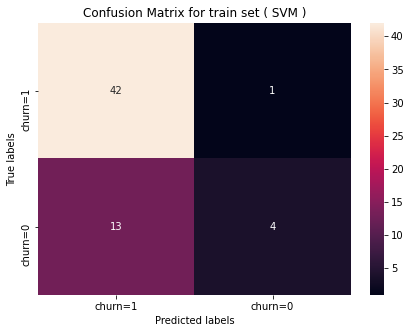

In [138]:
# visualization
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train set ( SVM )'); 
ax.xaxis.set_ticklabels(['churn=1','churn=0']) 
ax.yaxis.set_ticklabels(['churn=1','churn=0'])

[Text(0, 0.5, 'churn=1'), Text(0, 1.5, 'churn=0')]

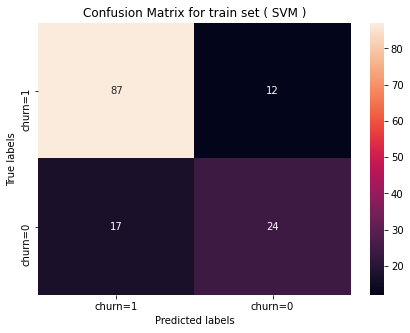

In [140]:
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train set ( SVM )'); 
ax.xaxis.set_ticklabels(['churn=1','churn=0']) 
ax.yaxis.set_ticklabels(['churn=1','churn=0'])

In [141]:
# using classification report for test set
print(classification_report(y_test, yhat_s))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        43
           1       0.80      0.24      0.36        17

    accuracy                           0.77        60
   macro avg       0.78      0.61      0.61        60
weighted avg       0.77      0.77      0.72        60



In [142]:
## using classification report for train set
print(classification_report(y_train, yhat_sn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.67      0.59      0.62        41

    accuracy                           0.79       140
   macro avg       0.75      0.73      0.74       140
weighted avg       0.79      0.79      0.79       140

